In [79]:
import seaborn as sns
import pandas as pd
import psycopg2

Grupo: Ana Carolina, Emanuel Medeiros e Pedro Henrique 
Tema: Tratamento efetivo - 2019/1

In [80]:
conn = psycopg2.connect(host="localhost",database="tratamento_efetivo", user="postgres", password="1234")

# Relatório 1

#### Relatório para informar os tratamentos em andamentos e a quantia de pacientes realizando esses tratamentos

In [84]:
relatorio1 = pd.read_sql_query("""
select indisp.indisposicao as 
"Doença_tratada",count(trat.cod_tratamento) as qtde_pessoas_no_tratamento from tratamento trat
inner join indisposicao indisp on (trat.cod_indisposicao = indisp.cod_indisposicao) 
where fim_trat is null group by indisp.indisposicao
                            """,conn)

In [105]:
df = pd.DataFrame(relatorio1)
cm = sns.light_palette("brown", as_cmap=True)
df.style.background_gradient(cmap=cm)


,Doença_tratada,qtde_pessoas_no_tratamento
0,Insônia,6
1,Catarata,1
2,Miopia,3
3,Anemia,1
4,Pressão alta,3
5,Febre,3
6,Epilepsia,5
7,Pneumonia,3
8,Depressão,4
9,Tumor,5


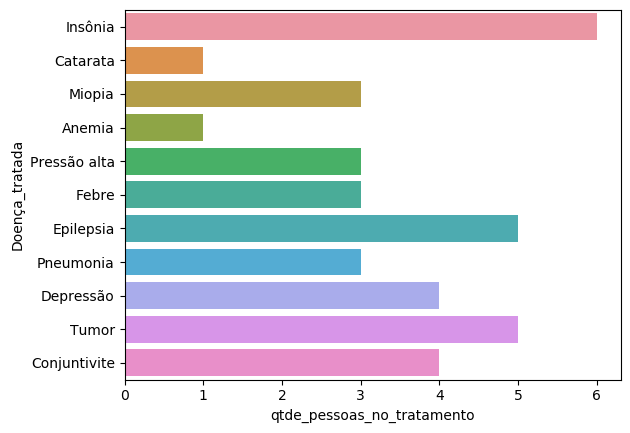

In [106]:
import seaborn as sns
sns.barplot(x="qtde_pessoas_no_tratamento", y="Doença_tratada",data=df,orient='h')

#### Relatório que retorna o número de tratamentos finalizados nos hospitais, separando por tipo de tramento


# Relatório 2

#### Relatório que retorna a incidência de doenças em um determinado estado



In [129]:
relatorio2 = pd.read_sql_query("""
select Estado,doenca_tratada,sum(Numero_tratamentos) as qtde_tratamentos from ( select est.estado as Estado,indisp.indisposicao 
as Doenca_tratada, count(trat.cod_indisposicao) as Numero_tratamentos from tratamento trat
inner join paciente pac on (trat.cod_paciente = pac.cod_paciente)
inner join endereco ende on (pac.cod_end = ende.cod_end) inner join rua on (ende.cod_rua = rua.cod_rua)
inner join bairro on (rua.cod_bairro = bairro.cod_bairro) inner join cidade cid on (bairro.cod_cidade = cid.cod_cidade)
inner join estado est on (cid.cod_estado = est.cod_estado) 
inner join indisposicao indisp on (trat.cod_indisposicao = indisp.cod_indisposicao)
where est.cod_estado = 21 group by pac.cod_paciente,est.cod_estado,indisp.indisposicao) 
as relatorio_doenca_estado group by Estado,Doenca_tratada;
                            """,conn)

In [130]:
df = pd.DataFrame(relatorio2)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

,estado,doenca_tratada,qtde_tratamentos
0,Espirito Santo,Labirintite,1
1,Espirito Santo,Depressão,1
2,Espirito Santo,Insônia,2
3,Espirito Santo,Dengue,12
4,Espirito Santo,Epilepsia,1
5,Espirito Santo,Pneumonia,7
6,Espirito Santo,Catarata,7
7,Espirito Santo,Gripe,3
8,Espirito Santo,Conjuntivite,7
9,Espirito Santo,Miopia,3


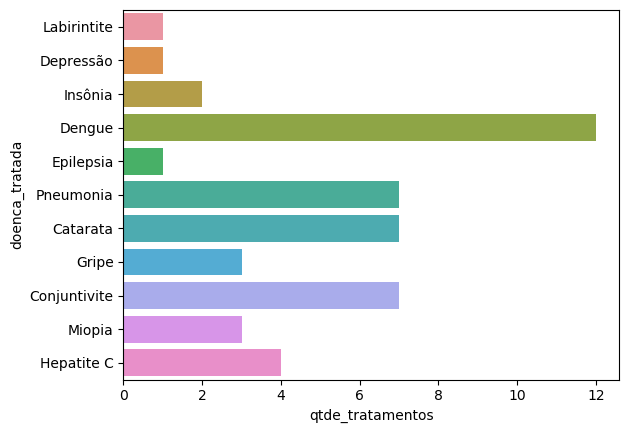

In [135]:
import seaborn as sns
sns.barplot(x="qtde_tratamentos", y="doenca_tratada",data=df,orient='h')

# Relatório 3

#### Relatório usado para verificar o número de tratamentos que foram realizados/finalizados em cada hospital, independente do tipo de tratamento


In [89]:
relatorio3 = pd.read_sql_query("""
select hosp.hospital as hospital,count(trat.cod_hospital) as 
quantidade_de_tratamentos_realizado_pelo_hospital from tratamento trat
inner join hospital hosp on (trat.cod_hospital = hosp.cod_hospital) 
where fim_trat is not null group by hosp.cod_hospital;
                            """,conn)

In [90]:
df = pd.DataFrame(relatorio3)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)


,hospital,quantidade_de_tratamentos_realizado_pelo_hospital
0,Hospital Paineiras,1
1,Hospital São Lucas Copacabana,3
2,Hospital São Camilo,2
3,Hospital sao lucas,2
4,Hospital Vitória Apart,2
5,Hospital Santa Rosália,1
6,Hospital Israelita Albert Einstein,4
7,Hospital São Domingos,1
8,Clínica Viver Bem,1
9,Hospital Santa Cruz,1


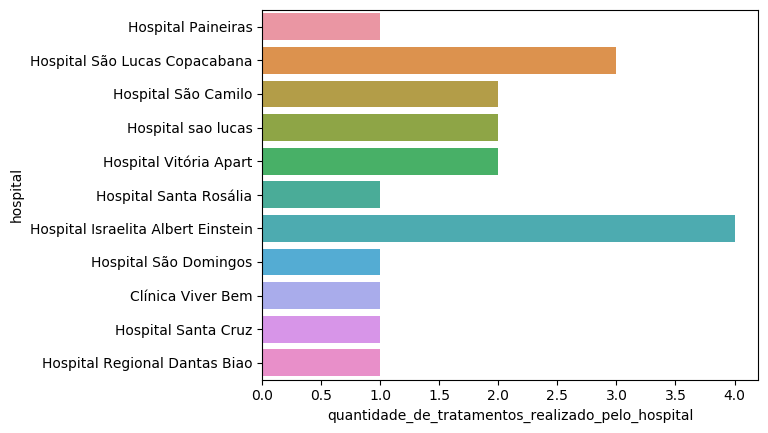

In [91]:
import seaborn as sns
sns.barplot(x="quantidade_de_tratamentos_realizado_pelo_hospital", y="hospital",data=df,orient='h')

# Relatório 4

#### Relatório contendo a média de duração dos tratamentos 

In [92]:
relatorio4 = pd.read_sql_query("""
select "Tratamento",avg("Duração do tratamento") as Media_de_duração from (select pac.nome_paciente,indisp.indisposicao as 
"Tratamento", trat.ini_trat,trat.fim_trat, age(fim_trat,ini_trat) as "Duração do tratamento" 
from tratamento trat inner join paciente pac on (pac.cod_paciente = trat.cod_paciente)
inner join indisposicao indisp on (trat.cod_indisposicao = indisp.cod_indisposicao) 
where fim_trat is not null) as teste
group by "Tratamento"
                            """,conn)

In [93]:

relatorio4

,Tratamento,media_de_duração
0,Asma,30 days 00:00:00
1,Dengue,72 days 12:00:00
2,Febre,5 days 00:00:00
3,Pneumonia,26 days 12:00:00
4,Conjuntivite,7 days 00:00:00
5,Sinusite,12 days 00:00:00
6,Gastroenterite,5 days 00:00:00
7,Calculo Renal,10 days 00:00:00
8,Labirintite,21 days 08:00:00
9,Hepatite C,13 days 00:00:00


# Relatório 5

#### Relatório contendo a relação do número de pessoas em cada tratamento com o número total de medicamentos em cada tratamento

In [94]:
pacientes_tratamento = pd.read_sql_query("""
select pac.cod_paciente as "Código paciente", pac.nome_paciente from tratamento trat
inner join paciente pac on (trat.cod_paciente = pac.cod_paciente) group by pac.cod_paciente;
                            """,conn)

Para usar o relatório 5 é preciso informar o código do paciente para ver quais doenças ele está tratando ou tratou e quantos medicamentos usou em cada um. Por isso a tabela abaixo é para auxiliar na procura pelo código do paciente.

In [95]:
pacientes_tratamento

,Código paciente,nome_paciente
0,8,Clarice Pereira Silva
1,10,Thiago Correia Neves
2,9,Joana Medeiros
3,7,Davi Santos
4,1,José Alves
5,5,Ana Kruger Santos
6,4,João Pedro
7,2,Maria Souza
8,6,Miguel Pereira
9,3,Pedro Santos


In [96]:
relatorio5 = pd.read_sql_query("""
select pac.nome_paciente,indisp.indisposicao as tratamento,
count(med.cod_tratamento) as qtde_medicamento,
trat.ini_trat as "Inicio do tratamento",trat.fim_trat as "Fim do tratamento",
medico.nome_medico as "Médico responsável",hosp.hospital from tratamento trat
inner join medico on (trat.cod_medico = medico.cod_medico)
inner join paciente pac on (trat.cod_paciente = pac.cod_paciente) 
inner join indisposicao indisp on (trat.cod_indisposicao = indisp.cod_indisposicao)
inner join medicamento med on (trat.cod_tratamento = med.cod_tratamento)
inner join hospital hosp on (trat.cod_hospital = hosp.cod_hospital)
where trat.cod_paciente = 1
group by pac.nome_paciente,trat.cod_tratamento,medico.cod_medico,hosp.cod_hospital,med.cod_tratamento,indisp.cod_indisposicao;
                            """,conn)

In [104]:
df = pd.DataFrame(relatorio5)
cm = sns.light_palette("purple", as_cmap=True)
df.style.background_gradient(cmap=cm)


,nome_paciente,tratamento,qtde_medicamento,Inicio do tratamento,Fim do tratamento,Médico responsável,hospital
0,José Alves,Gripe,1,2017-11-15,2017-11-20,Carlos Martins,Hospital sao lucas
1,José Alves,Dengue,2,2018-05-21,2018-08-30,Carlos Martins,Hospital sao lucas
2,José Alves,Pneumonia,4,2019-05-01,None,Sabrina Fantin,Hospital Vitória Apart
3,José Alves,Hepatite C,3,2019-05-20,2019-06-02,Sabrina Fantin,Hospital Vitória Apart
4,José Alves,Catarata,3,2019-06-01,None,Sabrina Fantin,Hospital Vitória Apart


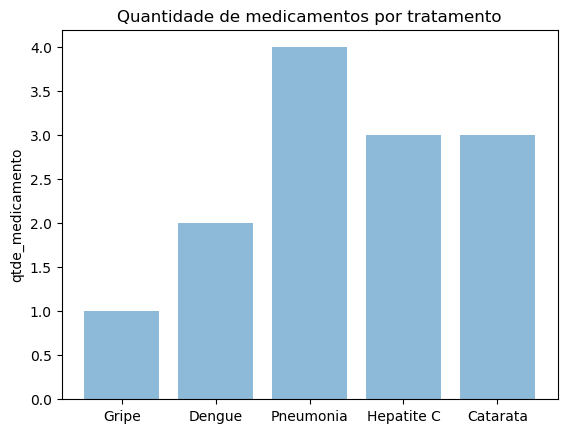

In [98]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.tratamento)
y_pos = np.arange(len(objects))
performance = list(df.qtde_medicamento)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('qtde_medicamento')
plt.title('Quantidade de medicamentos por tratamento')
 
plt.show()

# Relatório 6 

In [87]:
relatorio6 = pd.read_sql_query("""
select hosp.hospital,indisp.indisposicao 
as "Tratamento", count(trat.cod_indisposicao) as "Número_tratamentos_finalizados" from tratamento trat
inner join hospital hosp on (trat.cod_hospital = hosp.cod_hospital)
inner join indisposicao indisp on (trat.cod_indisposicao = indisp.cod_indisposicao)
where fim_trat is not null group by hosp.hospital,indisp.indisposicao;
                            """,conn)

In [88]:
df = pd.DataFrame(relatorio6)
cm = sns.light_palette("blue", as_cmap=True)
df.style.background_gradient(cmap=cm)

,hospital,Tratamento,Número_tratamentos_finalizados
0,Hospital Santa Cruz,Calculo Renal,1
1,Clínica Viver Bem,Labirintite,1
2,Hospital sao lucas,Gripe,1
3,Hospital Vitória Apart,Gripe,1
4,Hospital Santa Rosália,Conjuntivite,1
5,Hospital Regional Dantas Biao,Catarata,1
6,Hospital São Lucas Copacabana,Gastroenterite,1
7,Hospital Israelita Albert Einstein,Pneumonia,1
8,Hospital São Lucas Copacabana,Labirintite,1
9,Hospital sao lucas,Dengue,1
